# Example for the use of GFit

### 1. Import GFit and some packages

Import the class "GFit" from the file "GFit.py" 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

    
from GFit import GFit

### 2. Load and plot data for inspection

Next, we load the data containing x- and y values and (optionally) x- and y errors.

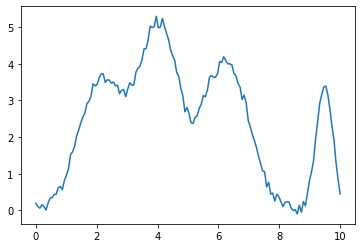

In [4]:
data=np.loadtxt('example_data.txt')
#Extract x,xerr,y and yerr from data
x, xerr, y, yerr=data[:,0], data[:,1], data[:,2], data[:,3]
#Plot data to see what's going on
plt.plot(x,y)
plt.show()

We observe, that our data features **4** gaussian peaks.

### 3. Create GFit instance with our data

In [5]:
#Pass the data to GFit
myfit=GFit(x,y,x_err=xerr, y_err=yerr) 

### 4. Get a guess for our fit

Peakfinder Message: 4/4 peaks found
Dipfinder Message: 3/3 dips found 

Guess successfull 



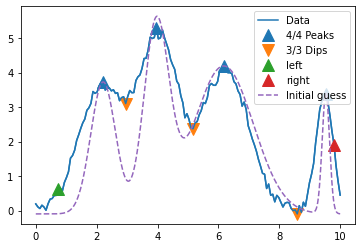

In [6]:
#Find the peaks and dips and get an initial guess for the fit

#The first argument of get_peaks_dips is the number of Gaussians we want to fit -> In our case it's ---->***4***<----!
#We activate plotcheck to see whether the dips and peaks were found correctly
#(For very noisy data one can activate "smoothing=True" to better find the peaks and dips)
pks, dps = myfit.get_peaks_dips(4, plotcheck=True)

#Get a guess from the found peaks and dips
guess = myfit.get_guess(pks,dps,plotcheck=True)

### 5. Execute the fit and get fit parameters

After obtaining the guess we can proceed to execute the fit. In addition to the sum of Gaussians the fit accounts for a global offset.

The fit function for $N$ Gaussians looks like:
$$
    f(x)=f_0+\sum_{k=1}^{N}A_k\cdot\exp\left[-\frac{(x-\mu_k)}{2\cdot\sigma_k^2}\right]
$$
with the fit parameters:
$$\begin{align}
    &f_0:& &\text{Offset} \\
    &A_k:& &\text{Amplitude of k-th Gaussian}\\
    &\mu_k:& &\text{Mean of k-th Gaussian}\\
    &\sigma_k: & &\text{Standard deviation (SVD) of k-th Gaussian}
    \end{align}
$$

Fit successfull, the fit parameters are: 

Offset:
[-0.0772938523678182 0.022752877435138874]
Gaussian 1 (Amplitude, Mean, SDV):
[[3.595230725710345 0.03094869836142543]
 [2.2691690558900985 0.01899242078098728]
 [0.9068392904032868 0.02300011567840688]]
Gaussian 2 (Amplitude, Mean, SDV):
[[4.706410654917644 0.06424801053148596]
 [4.084808876794162 0.009021916830630368]
 [0.5758086473612428 0.012270703275318791]]
Gaussian 3 (Amplitude, Mean, SDV):
[[4.160987094592121 0.02335425116771566]
 [6.2273155374712585 0.011812869224708365]
 [0.7953081018505247 0.01312626315914622]]
Gaussian 4 (Amplitude, Mean, SDV):
[[3.5066752403221253 0.06799139907418413]
 [9.49328628551775 0.013550914313190532]
 [0.26214618150677815 0.014263219520154668]]


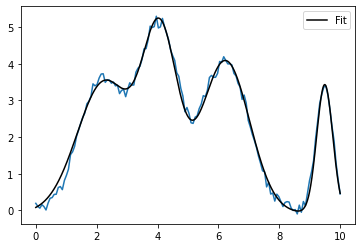

In [7]:
#fit the data, the 'fit' function returns and prints the fitparameters
#optionally one can also save the fitparameters in a txt file
fitparams = myfit.fit(guess, plotcheck=True, fitparamsname='example_fitparams.txt')

In the printed out fit parameters the first number is always the value and the second number the error (standard deviation) of the fit parameter. For example

    Offset:
    [-0.0772938523678182 0.022752877435138874]

means that 
$$f_0=0.0772938523678182 \quad \text{and} \quad \Delta f_0=0.022752877435138874\quad.$$
For the Gaussians

    Gaussian 1 (Amplitude, Mean, SDV):
    [[3.595230725710345 0.03094869836142543]
     [2.2691690558900985 0.01899242078098728]
     [0.9068392904032868 0.02300011567840688]]

means that
$$\begin{align}
    &A_1=3.595230725710345 \quad \text{and} \quad &\Delta A_1=0.03094869836142543\\
    &\mu_1=2.2691690558900985 \quad \text{and} \quad &\Delta \mu_1=0.01899242078098728\\
    &\sigma_1=0.9068392904032868 \quad \text{and} \quad &\Delta \sigma_1=0.02300011567840688
    \end{align}
$$

### 6. Save plot of data and fit

Using 'plot_save' we can create a nice plot and save it as a pdf file.

In [8]:
myfit.plot_save(savename='example_plot.pdf',title='My fit', xlabel='Voltage / V', ylabel='Counts / $10^3$', datalegend='Nice data', fitlegend='Even nicer fit')


 Plot successfully saved


<Figure size 360x216 with 0 Axes>

## Short summarized example code

Deactivating the plotchecks one can execute the whole procedure as:

In [9]:
from GFit import GFit #(if GFit.py is in the same folder)

data=np.loadtxt('example_data.txt')
x, xerr, y, yerr=data[:,0], data[:,1], data[:,2], data[:,3]

myfit=GFit(x,y,x_err=xerr, y_err=yerr) 

pks, dps = myfit.get_peaks_dips(4)
guess = myfit.get_guess(pks,dps)

fitparams = myfit.fit(guess, fitparamsname='example_fitparams.txt')

myfit.plot_save(savename='example_plot.pdf',title='My fit', xlabel='Voltage / V', ylabel='Counts / $10^3$', datalegend='Nice data', fitlegend='Even nicer fit')

Peakfinder Message: 4/4 peaks found
Dipfinder Message: 3/3 dips found 

Guess successfull 

Fit successfull, the fit parameters are: 

Offset:
[-0.0772938523678182 0.022752877435138874]
Gaussian 1 (Amplitude, Mean, SDV):
[[3.595230725710345 0.03094869836142543]
 [2.2691690558900985 0.01899242078098728]
 [0.9068392904032868 0.02300011567840688]]
Gaussian 2 (Amplitude, Mean, SDV):
[[4.706410654917644 0.06424801053148596]
 [4.084808876794162 0.009021916830630368]
 [0.5758086473612428 0.012270703275318791]]
Gaussian 3 (Amplitude, Mean, SDV):
[[4.160987094592121 0.02335425116771566]
 [6.2273155374712585 0.011812869224708365]
 [0.7953081018505247 0.01312626315914622]]
Gaussian 4 (Amplitude, Mean, SDV):
[[3.5066752403221253 0.06799139907418413]
 [9.49328628551775 0.013550914313190532]
 [0.26214618150677815 0.014263219520154668]]

 Plot successfully saved


<Figure size 360x216 with 0 Axes>